# Link to Google drive folder

Link to your google drive folder so files persist


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
ROOT_DIR = "/content/drive/My Drive/deep-learning/mirror-selfie"
MASK_RCNN_DIR = os.path.join(ROOT_DIR, "Mask_RCNN")
COCO_DIR = os.path.join(ROOT_DIR, "coco")
PCONV_DIR = os.path.join(ROOT_DIR, "PConv-Keras")

# Do this only the first time

Directory setup, git downloads and installs only need to be done once. If you are running this notebook on colab again, then skip this section


In [0]:
!mkdir drive/My\ Drive/deep-learning

mkdir: cannot create directory ‘drive/My Drive/deep-learning’: File exists


In [0]:
!mkdir drive/My\ Drive/deep-learning/mirror-selfie

In [0]:
os.chdir(ROOT_DIR)

In [0]:
!pwd

/content/drive/My Drive/deep-learning/mirror-selfie


In [0]:
!git clone https://github.com/matterport/Mask_RCNN.git
!git clone https://github.com/waleedka/coco.git
!git clone https://github.com/MathiasGruber/PConv-Keras.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 119.41 MiB | 18.68 MiB/s, done.
Resolving deltas: 100% (569/569), done.
Checking out files: 100% (76/76), done.
Cloning into 'coco'...
remote: Enumerating objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.40 MiB | 9.52 MiB/s, done.
Resolving deltas: 100% (540/540), done.
Cloning into 'PConv-Keras'...
remote: Enumerating objects: 393, done.
remote: Total 393 (delta 0), reused 0 (delta 0), pack-reused 393
Receiving objects: 100% (393/393), 62.27 MiB | 17.74 MiB/s, done.
Resolving deltas: 100% (201/201), done.


In [0]:
!ls

coco  Mask_RCNN  PConv-Keras  sample_data


In [0]:
os.chdir(MASK_RCNN_DIR)

In [0]:
!pwd

/content/drive/My Drive/deep-learning/mirror-selfie/Mask_RCNN


In [0]:
!pip3 install -r requirements.txt

In [0]:
!python3 setup.py install

In [0]:
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

In [0]:
os.chdir(COCO_DIR)

In [0]:
!make install -C PythonAPI

# Start again from here

Setup up Mask RCNN

In [0]:
os.chdir(ROOT_DIR)

In [0]:
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import coco
%matplotlib inline

In [0]:
import glob

In [0]:
os.chdir(MASK_RCNN_DIR)

In [0]:
import mrcnn.model as modellib
import mrcnn.utils as utils
import mrcnn.visualize as visualize
from mrcnn.config import Config

Using TensorFlow backend.


In [0]:
COCO_MODEL_PATH = os.path.join(MASK_RCNN_DIR, "mask_rcnn_coco.h5")
IMAGE_DIR = os.path.join(MASK_RCNN_DIR, "images")
MODEL_DIR = os.path.join(MASK_RCNN_DIR, "logs")

In [0]:
class InferenceConfig(Config):
  NAME = "mirror"
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1
  NUM_CLASSES = 81
  
config = InferenceConfig()
config.display()

In [0]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [0]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

**TEST ON AN IMAGE**

Do a forward pass with a test image to test if its working properly

Processing 1 images
image                    shape: (806, 605, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


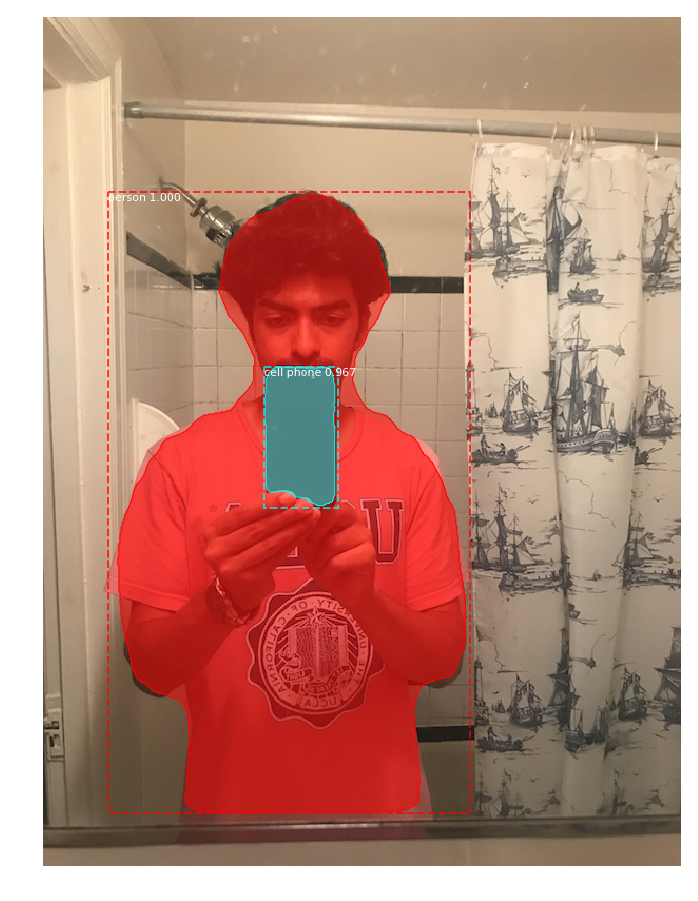

In [0]:
#run a forward pass with an image

my_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'IMG_6864.JPG'))

my_image_results = model.detect([my_image], verbose=1)

i = my_image_results[0]

visualize.display_instances(my_image, i['rois'], i['masks'], i['class_ids'], class_names, i['scores'])

In [0]:
i['class_ids']

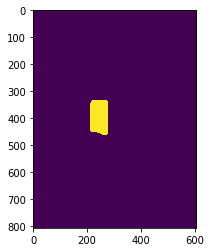

In [0]:
#view mask
mask = i['masks'][:,:,1] #phone is 68
plt.imshow(mask)

In [0]:
from PIL import Image
from PIL import ImageOps

In [0]:
MASK_DIR = os.path.join(MASK_RCNN_DIR, "masks")
VIDEO_FRAMES_DIR = os.path.join(MASK_RCNN_DIR, "video-frames")
VIDEO_DIR = os.path.join(MASK_RCNN_DIR, "videos")
VIDEO_WITH_MASK_FRAMES_DIR = os.path.join(MASK_RCNN_DIR, "video_with_mask_frames")

In [0]:
def save_mask(mask, mask_name, video_folder_name):
  # mask - numpy array of mask
  # mask_name - name of mask, will be an integer value based on frame count of video
  # video_folder_name - based on name of video the mask is created from
  
  mask = mask*255.0
  rgb = Image.fromarray(mask)
  
  if rgb.mode != 'RGB':
    rgb = rgb.convert('RGB')
    #inpainting requires mask to be black and rest to be white
    inverted = ImageOps.invert(rgb)
  
  mask_dir = os.path.join(MASK_DIR, video_folder_name)
  
  if not os.path.exists(mask_dir):
    os.makedirs(mask_dir)
    
  inverted = expand_mask_padding(np.array(inverted))
  
  inverted_expanded = Image.fromarray(inverted)
    
  inverted_expanded.save(os.path.join(mask_dir, '{0}.jpg'.format(str(mask_name))))

In [0]:
def save_mask_with_image(mask, mask_name, video_folder_name):
  
  
  mask_dir = os.path.join(VIDEO_WITH_MASK_FRAMES_DIR, video_folder_name)
  

  # flip from bgr to rgb otherwise image gets saved with blue tone  
  mask = mask[:,:,::-1]
  
  rgb = Image.fromarray(mask)
  
  if rgb.mode != 'RGB':
    rgb = rgb.convert('RGB')
  
  if not os.path.exists(mask_dir):
    os.makedirs(mask_dir)
    
  rgb.save(os.path.join(mask_dir,'{0}.jpg'.format(str(mask_name))))

In [0]:
def expand_mask_padding(mask, padding=8):
  # expand the phone mask to completely cover the phone
  # if phone is not covered the inpainting result is poor
  phone_mask = []
  
  for y in range(0,len(mask[0])):
    for x in range(0, len(mask[1])):
      if np.array_equal(mask[y][x], [0,0,0]): # if masked area
        phone_mask.append((x,y))
        
  
  # draw larger circles with their center on each mask pixel
  for c in range(0, len(phone_mask)):
    cv2.circle(mask, phone_mask[c], padding, (0,0,0), -1)
    
  return mask

In [0]:
#save_mask(mask, 2, "test")

In [0]:
import cv2

In [0]:
def get_video_list():
  file_names = next(os.walk(VIDEO_DIR))[2]
  my_vids = []
  for i in file_names:
    if i.endswith(".mp4"):
      my_vids.append(i)
    else:
      print("Unsupported: Must be .mp4")
      return
  return my_vids

In [0]:
from IPython.display import clear_output

In [0]:
def split_video_to_frames(video_name="", size=(512,512)):
  
  #video_name - do for the specific video. If not passed in, do for all vids in the directory
  
  if not video_name:
    # if no video name then do this for all vids in dir
    vids = get_video_list()
  else:
    vids = [video_name]
    
  for v in vids:
  
    capture = cv2.VideoCapture(os.path.join(VIDEO_DIR, v))
  
    frame_count = 0
  
    while True:
      success, frame = capture.read()

      if not success:
        #if no frames left
        break

      frame = cv2.resize(frame, size)

      frame_count+=1

      result = model.detect([frame], verbose=0)
      if frame_count%10==0:
        clear_output()
        print("predicted frame #: {0}".format(frame_count))
      p = result[0]
      
      dir_location = os.path.join(VIDEO_FRAMES_DIR, v)
      
      if not os.path.exists(dir_location):
        os.makedirs(dir_location)
      
      # save each frame
      cv2.imwrite(os.path.join(dir_location,"{0}.jpg".format(frame_count)), frame)
      # loop over detected ROIs
      # SAVE PHONE MASK
      for q in range(0, p['rois'].shape[0]):
        classId = p['class_ids'][q]
        if(classId == 68):
          # mobile phone
          mask = p['masks'][:,:,q]
          #mask_with_image = visualize.apply_mask(frame, mask, (0,0,1), alpha=0.8)
          mask_with_image = visualize.apply_mask(frame, mask, (1,1,1), alpha=1)  # for video, wanting to show it as white
          save_mask_with_image(mask_with_image, frame_count, v)
          save_mask(mask, frame_count, v)
        else:
          continue  
          
      if 68 not in p['class_ids']:
        print("PHONE NOT DETECTED -> SAVING EMPTY MASK")
        
        # if mask not found then create an empty mask
        # so numbering of frames and masks stays consistent
        
        mask = np.zeros((512,512))
        save_mask(mask, frame_count, v)
          
    frame_count = 0
    
  capture.release()
  

In [0]:
split_video_to_frames("test-small.mp4")  # only for test-small.mp4 video
#split_video_to_frames() # for all videos in the VIDEO_DIR
#split_video_to_frames("white-mask.mp4")

predicted frame #: 400


# SETUP PCONV NETWORK FOR INPAINTING

In [0]:
os.chdir(PCONV_DIR)

In [0]:
from copy import deepcopy
from libs.pconv_model import PConvUnet
from libs.util import MaskGenerator, ImageChunker

In [0]:
pconv_model = PConvUnet(vgg_weights=None, inference_only=True)

In [0]:
PCONV_MODEL_WEIGHTS = os.path.join(PCONV_DIR, "model-weights", "phase2", "weights.01-1.21.h5")
IMAGENET_WEIGHTS = os.path.join(PCONV_DIR, "pconv_imagenet.26-1.07.h5")
INPAINTED_FRAMES = os.path.join(PCONV_DIR, "inpainted_frames")

In [0]:
#pconv_model.load(PCONV_MODEL_WEIGHTS, train_bn=False)
pconv_model.load(IMAGENET_WEIGHTS, train_bn=False)

In [0]:
m_test = Image.open(os.path.join(MASK_DIR,"test-small.mp4/10.jpg"))
m_test = np.array(m_test)

In [0]:
def load_mask(mask_path):
  
  mask = cv2.imread(mask_path)
  
  return (mask > 1).astype(np.uint8)

In [0]:
def load_image(img_path):
  
  img = Image.open(img_path)
  img = np.array(img)/255.0
  
  return img

In [0]:
def sort_folder(folder_path):
  #sort images in order
  if not os.path.exists(folder_path):
    raise("No such folder")
    return
  
  images = list(glob.iglob(os.path.join(folder_path, '*.jpg')))

  images = sorted(images, key=lambda x: float(os.path.split(x)[1][:-4]))
  
  if len(images) == 0:
    raise("Folder is empty")
  return images

In [0]:
def do_inpainting(video_name, ext=""):
  
  masks = sort_folder(os.path.join(MASK_DIR, video_name))
  images = sort_folder(os.path.join(VIDEO_FRAMES_DIR, video_name))
    
  if len(masks) != len(images):
    raise("The number of masks and image frames do not match")
    return
  

  out_dir = os.path.join(INPAINTED_FRAMES, '{0}{1}'.format(video_name, ext))
  if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
  for index, (img, mask) in enumerate(zip(images, masks)):
    i = load_image(img)
    m = load_mask(mask)
    
    i = np.expand_dims(i, axis=0)
    m = np.expand_dims(m, axis=0)
    
    pred = pconv_model.predict([i,m])
    
    skimage.io.imsave(os.path.join(out_dir, "{0}.jpg".format(index)), pred[0])
    
  

In [0]:
#do_inpainting("final-short.mp4","my-weights")
do_inpainting("final-short.mp4","imagenet")

# CREATE VIDEO


In [0]:
def make_video(folder, video_name, output_name, images=None, fps=30, is_color=True, format="FMP4"):
  
  # folder - INPAINTING_FRAMES, VIDEO_FRAMES_DIR, VIDEO_WITH_MASK_FRAMES_DIR
  # video_name - name of video sub folder in above param folder
  # output_name - name to save video as
  
  from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
  fourcc = VideoWriter_fourcc(*format)
  vid = None
  
  images = sort_folder(os.path.join(folder,video_name))
  
  output_folder = os.path.join(PCONV_DIR, "output_videos")
  
  if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
  for image in images:
    if not os.path.exists(image):
      raise FileNotFoundError(image)
    img = imread(image)
    if vid is None:
      size = img.shape[1], img.shape[0]
      vid = VideoWriter(os.path.join(output_folder, "{0}.mp4".format(output_name)), fourcc, float(fps), size, is_color)
    vid.write(img)
  vid.release()
  return vid

In [0]:
make_video(INPAINTED_FRAMES, "final-short.mp4my-weights", "my-weights-inpainted")
make_video(VIDEO_WITH_MASK_FRAMES_DIR, "final-short.mp4", "my-weights-with-mask")
make_video(VIDEO_FRAMES_DIR, "final-short.mp4", "my-weights-original")

<VideoWriter 0x7f0b01beff30>

In [0]:
make_video(INPAINTED_FRAMES, "final-short.mp4imagenet", "imagenet-inpainted")

<VideoWriter 0x7f0b00c316d0>